In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pyodbc
import sqlite3 as sql
from IPython.display import Markdown, display
% matplotlib inline

def printmd(string):
    display(Markdown(string))

In [2]:
con = sql.connect('Equity.db')
c = con.cursor()

In [3]:
df = pd.read_csv("Revenue_Aid_2016.csv")

In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

In [5]:
df

,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [6]:
df.to_sql("equity", con, schema=None,
         if_exists='replace', index=True, index_label=None,
         chunksize=None, dtype=None)

In [7]:
drop_table_sql = "DROP TABLE IF EXISTS equity;"

In [8]:
df1 = pd.read_sql("SELECT * FROM Equity", con)
df1

,index,school_id,survey_year,institution_name,state_cd,classification_name,sanction_name,total_mens_team_revenue,total_womens_team_revenue,not_allocated_by_gender/sport_revenue,grand_total_revenue,mens_team_athletic_student_aid,womens_team_athletic_student_aid,male_undergraduates,female_undergraduates,total_undergraduates
0,0,1,2016,University of Louisville,KY,NCAA Division I-FBS,NCAA,87066830,1723173,33655301,122445304,6249734,5907156,5925,6400,12325
1,1,2,2016,University of Kentucky,KY,NCAA Division I-FBS,NCAA,65217902,1626718,55447093,122307014,7119237,4874527,9420,11352,20772
2,2,3,2016,Indiana University,IN,NCAA Division I-FBS,NCAA,62767976,756377,41294985,104819338,8487821,7039065,16085,15799,31884


In [9]:
revenue = pd.read_sql("SELECT institution_name, grand_total_revenue FROM Equity", con)
revenue

,institution_name,grand_total_revenue
0,University of Louisville,122445304
1,University of Kentucky,122307014
2,Indiana University,104819338


In [10]:
aid = pd.read_sql("SELECT institution_name, mens_team_athletic_student_aid, womens_team_athletic_student_aid FROM Equity", con)
aid

,institution_name,mens_team_athletic_student_aid,womens_team_athletic_student_aid
0,University of Louisville,6249734,5907156
1,University of Kentucky,7119237,4874527
2,Indiana University,8487821,7039065


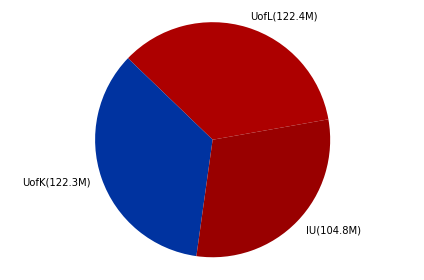

In [35]:
labels = ['UofL(122.4M)', 'UofK(122.3M)', 'IU(104.8M)']
sizes = revenue['grand_total_revenue']

colors = ['#AD0000', '#0033a0', '#990000']

fig1, ax1 = plt.subplots()

patches, texts = ax1.pie(sizes, colors = colors,
                                    labels = labels, startangle=10)


for text in texts:
    text.set_color('black')
    
for autotext in autotexts:
    autotext.set_color('grey')
    
ax1.axis('equal')
plt.tight_layout()
plt.show()

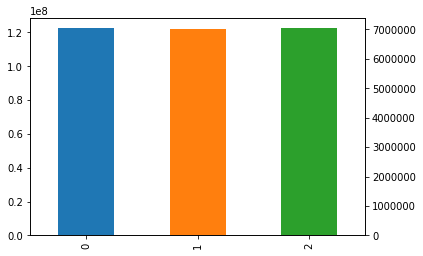

In [13]:
revenue.loc[:,'grand_total_revenue'].plot(kind='bar')
aid.loc[:'mens_team_athletic_student_aid',
        'womens_team_athletic_student_aid'].plot(kind='bar',
                                                secondary_y=True)



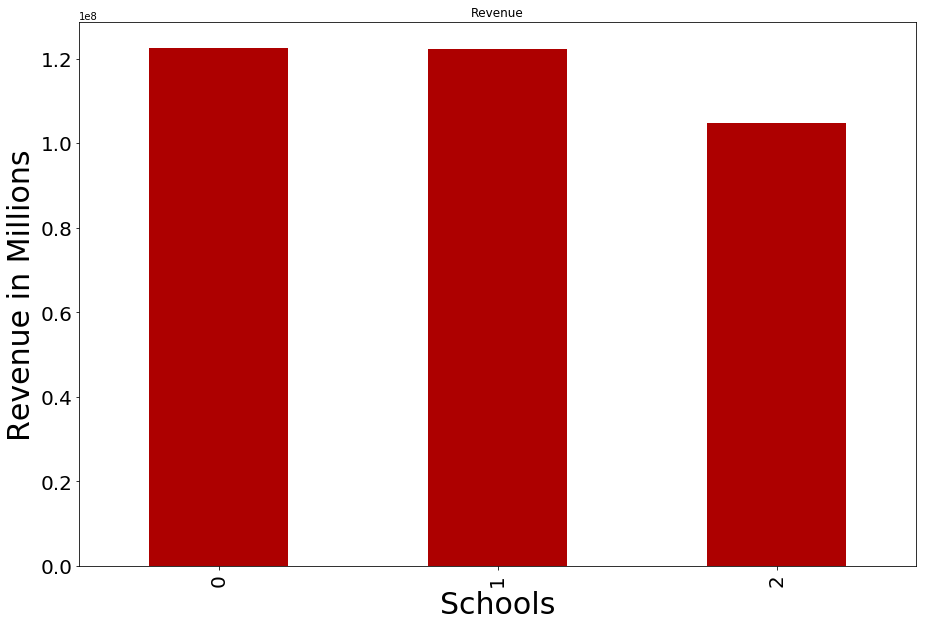

In [65]:
title = ("Revenue")
ax = revenue[['institution_name', 'grand_total_revenue']].plot(kind='bar',
                                                              title=title,
                                                              color =("#AD0000",
                                                                      "#0033a0",
                                                                      "#990000"),
                                                           figsize=(15, 10),
                                                                 legend=False,
                                                              fontsize=20)
ax.set_xlabel("Schools", fontsize=30)
ax.set_ylabel("Revenue in Millions", fontsize=30)
plt.show()

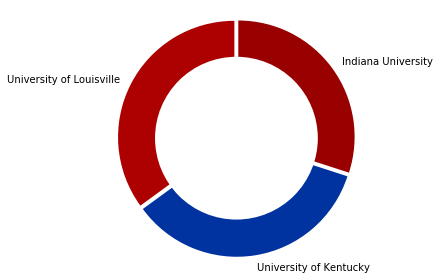

In [69]:
labels = revenue['institution_name']
sizes = revenue['grand_total_revenue']

colors = ['#AD0000', '#0033a0', '#990000']

explode = (0.02, 0.02, 0.02)

fig, ax = plt.subplots()

plt.pie(sizes, colors = colors, labels=labels, startangle=90,
        explode = explode)

center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
labels = ['UofL', 'UofK', 'IU']

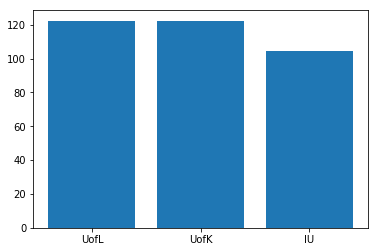

In [13]:
height = [122.445, 122.307, 104.819]

bars = ('UofL', 'UofK', 'IU')
y_pos = np.arange(len(bars))

plt.bar(y_pos, height)

plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')

plt.show()